#Conetent to be covered
- Imdb Case study
- Apply
- isin
- Group by
  - groups
  - ngroups
  - get_group
- Problem statement: Which director is more productive



# IMDB data exploration

In [ ]:
!pip install --upgrade gdown

In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 29.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 32.4MB/s]


In [ ]:
import pandas as pd
import numpy as np

movies = pd.read_csv('movies.csv', index_col=0)
directors = pd.read_csv('directors.csv', index_col=0)





In [ ]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [ ]:
data=movies.merge(directors,left_on='director_id',right_on='id',how='left')
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


In [ ]:
data.drop(['director_id','id_y'],axis=1,inplace=True)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
data['budget']=data['budget']/1000000

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
data['revenue']=np.round(data['revenue']/1000000,2)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
data.shape

(1465, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   float64
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   float64
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 137.5+ KB


**Note** : Converted **USD** into **Millions** so that it is easy to interprate

In [ ]:
data.describe(include='object')

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Avatar,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


#Apply
In pandas, the apply() function is used to apply a function along an axis of a DataFrame or Series. It can be very useful for performing operations or transformations on your data.

In [ ]:
def encode(data):
  if data=='Male':
    return 0
  else:
    return 1

In [ ]:
data['gender']=data['gender'].apply(encode)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0


#Grouping
- Grouping in pandas allows you to split the data into different subsets, apply a function to each subset, and then combine the results back together

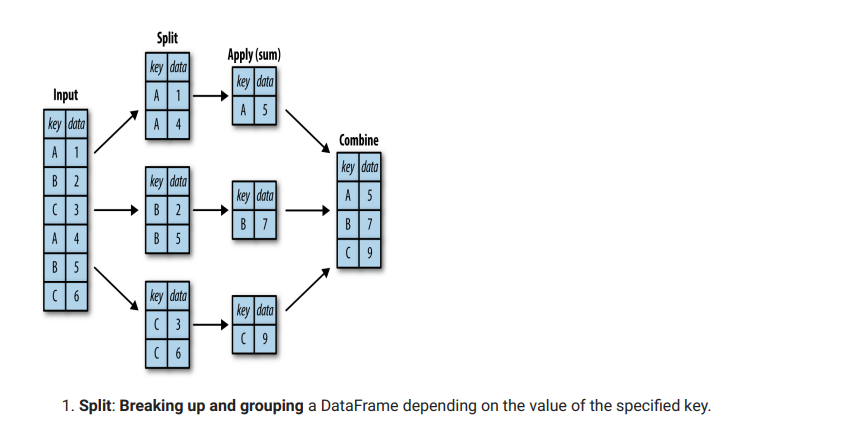

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.0,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0
1,43598,300.0,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0
2,43599,245.0,107,880.67,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0
3,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0
4,43602,258.0,115,890.87,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0


In [ ]:
data.groupby('director_name')['title'].count()

,title
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


In [ ]:
data.groupby('director_name')['title'].count().sort_values(ascending=False)

,title
director_name,
Steven Spielberg,26
Clint Eastwood,19
Martin Scorsese,19
Woody Allen,18
Robert Rodriguez,16
...,...
Paul Weitz,5
John Madden,5
Paul Verhoeven,5


###Get groups

In [ ]:
data.groupby('director_name').get_group('Steven Spielberg')

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
37,43650,185.0,75,786.64,Indiana Jones and the Kingdom of the Crystal S...,5.7,2495,2008,May,Wednesday,Steven Spielberg,0
105,43772,140.0,44,183.35,The BFG,6.0,1000,2016,Jun,Wednesday,Steven Spielberg,0
110,43782,132.0,48,591.74,War of the Worlds,6.2,2322,2005,Jun,Tuesday,Steven Spielberg,0
114,43787,130.0,89,371.94,The Adventures of Tintin,6.7,2061,2011,Oct,Tuesday,Steven Spielberg,0
166,43872,102.0,65,358.37,Minority Report,7.1,2608,2002,Jun,Thursday,Steven Spielberg,0
219,43960,100.0,34,235.93,A.I. Artificial Intelligence,6.8,1974,2001,Jun,Friday,Steven Spielberg,0
296,44105,73.0,2,229.07,The Lost World: Jurassic Park,6.2,2487,1997,May,Friday,Steven Spielberg,0
304,44118,60.0,57,219.42,The Terminal,7.0,1910,2004,Jun,Thursday,Steven Spielberg,0
309,44125,70.0,29,130.36,Munich,6.9,696,2005,Dec,Thursday,Steven Spielberg,0
333,44169,70.0,33,300.85,Hook,6.6,1532,1991,Dec,Wednesday,Steven Spielberg,0


###Groups

In [ ]:
data.groupby('director_name').groups

{'Adam McKay': [176, 323, 366, 505, 839, 916], 'Adam Shankman': [265, 300, 350, 404, 458, 843, 999, 1231], 'Alejandro González Iñárritu': [106, 749, 1015, 1034, 1077, 1405], 'Alex Proyas': [95, 159, 514, 671, 873], 'Alexander Payne': [793, 1006, 1101, 1211, 1281], 'Andrew Adamson': [11, 43, 328, 501, 947], 'Andrew Niccol': [533, 603, 701, 722, 1439], 'Andrzej Bartkowiak': [349, 549, 754, 911, 924], 'Andy Fickman': [517, 681, 909, 926, 973, 1023], 'Andy Tennant': [314, 320, 464, 593, 676, 885], 'Ang Lee': [99, 134, 748, 840, 1089, 1110, 1132, 1184], 'Anne Fletcher': [610, 650, 736, 789, 1206], 'Antoine Fuqua': [310, 338, 424, 467, 576, 808, 818, 1105], 'Atom Egoyan': [946, 1128, 1164, 1194, 1347, 1416], 'Barry Levinson': [313, 319, 471, 594, 878, 898, 1013, 1037, 1082, 1143, 1185, 1345, 1378], 'Barry Sonnenfeld': [13, 48, 90, 205, 591, 778, 783], 'Ben Stiller': [209, 212, 547, 562, 850], 'Bill Condon': [102, 307, 902, 1233, 1381], 'Bobby Farrelly': [352, 356, 481, 498, 624, 630, 654, 80

In [ ]:
data.groupby('director_name').ngroups

199

In [ ]:
# Which director is the most productive?

In [ ]:
final_data=data.groupby('director_name').aggregate({'year':['min','max'],'title':['count']})
final_data

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]

In [ ]:
final_data.sort_values(by=('title','count'),ascending=False,inplace=True)

In [ ]:
final_data['Years_active'] = final_data[('year','max')]-final_data[('year','min')]

In [ ]:
final_data

year       title Years_active
                   min   max count             
director_name                                  
Steven Spielberg  1977  2016    26           39
Clint Eastwood    1982  2014    19           32
Martin Scorsese   1976  2013    19           37
Woody Allen       1977  2013    18           36
Robert Rodriguez  1992  2014    16           22
...                ...   ...   ...          ...
Paul Weitz        2004  2013     5            9
John Madden       1998  2015     5           17
Paul Verhoeven    1990  2006     5           16
John Whitesell    2001  2011     5           10
Kevin Reynolds    1991  2016     5           25

[199 rows x 4 columns]

In [ ]:
final_data['productivity']=final_data[('title','count')]/final_data['Years_active']
final_data['productivity']*100

,productivity
director_name,
Steven Spielberg,66.666667
Clint Eastwood,59.375000
Martin Scorsese,51.351351
Woody Allen,50.000000
Robert Rodriguez,72.727273
...,...
Paul Weitz,55.555556
John Madden,29.411765
Paul Verhoeven,31.250000


In [ ]:
final_data.sort_values('productivity',ascending=False,inplace=True )
final_data

year       title Years_active productivity
                   min   max count                          
director_name                                               
Tyler Perry       2006  2013     9            7     1.285714
Jason Friedberg   2006  2010     5            4     1.250000
Shawn Levy        2002  2014    11           12     0.916667
Robert Rodriguez  1992  2014    16           22     0.727273
Adam Shankman     2001  2012     8           11     0.727273
...                ...   ...   ...          ...          ...
Lawrence Kasdan   1985  2012     5           27     0.185185
Luc Besson        1985  2014     5           29     0.172414
Michael Apted     1980  2010     5           30     0.166667
Sidney Lumet      1976  2006     5           30     0.166667
Robert Redford    1980  2010     5           30     0.166667

[199 rows x 5 columns]

In [ ]:
data.groupby('director_name').get_group('Tyler Perry')

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
915,45440,0.0,5,0.00,A Madea Christmas,7.0,35,2013,Dec,Friday,Tyler Perry,0
991,45670,0.0,1,37.00,For Colored Girls,7.0,22,2010,Nov,Friday,Tyler Perry,0
1007,45704,20.0,2,60.07,Why Did I Get Married Too?,6.1,29,2010,Apr,Friday,Tyler Perry,0
1009,45707,0.0,7,0.00,Madea's Witness Protection,5.9,52,2012,Jun,Friday,Tyler Perry,0
1062,45884,0.0,2,0.00,I Can Do Bad All By Myself,6.0,40,2009,Sep,Friday,Tyler Perry,0
1098,45990,0.0,3,90.51,Madea Goes to Jail,6.4,52,2009,Feb,Monday,Tyler Perry,0
1140,46128,15.0,2,55.18,Why Did I Get Married?,6.1,33,2007,Oct,Friday,Tyler Perry,0
1172,46274,0.0,4,0.00,Good Deeds,6.2,45,2012,Feb,Thursday,Tyler Perry,0
1244,46581,6.0,5,57.23,Madea's Family Reunion,6.0,77,2006,Feb,Friday,Tyler Perry,0


#Insights
 - Tyler Peryy is the most productive director
 - Steven spielberg have directed most number of movies